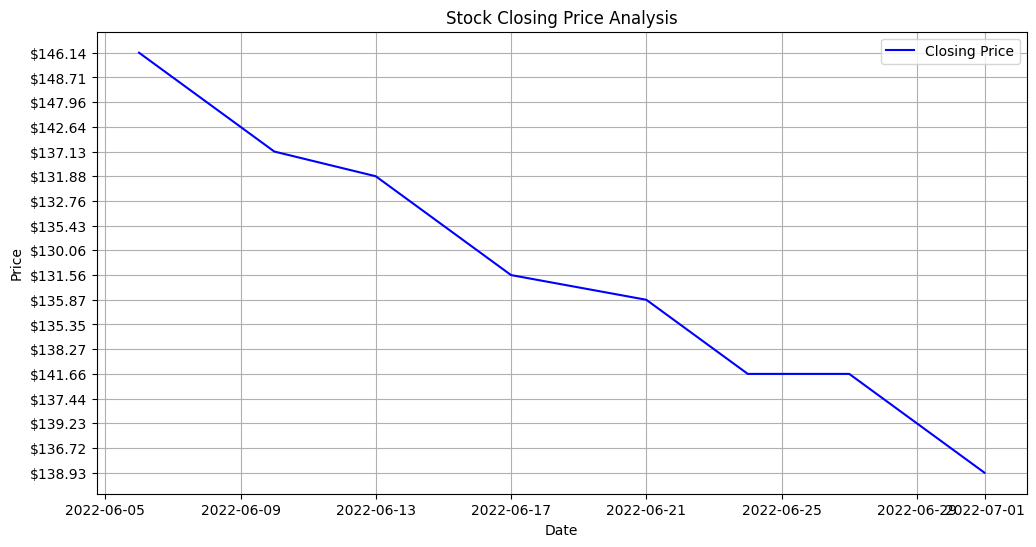

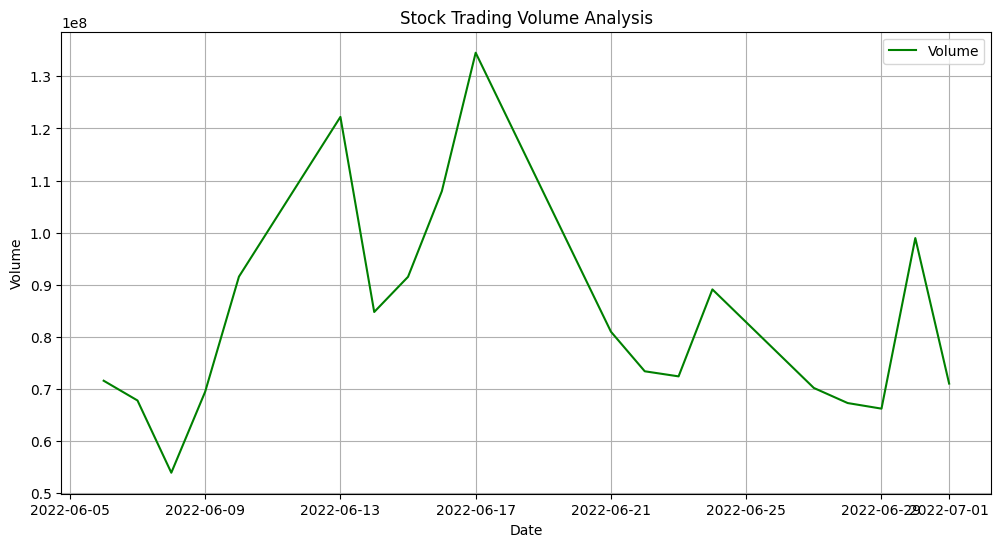

DataError: No numeric types to aggregate

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler


df = pd.read_csv('HistoricalData.csv')


dates = pd.to_datetime(df['Date'])
closing_prices = df['Close/Last']
volume = df['Volume']
open_prices = df['Open']
high_prices = df['High']
low_prices = df['Low']
df['High'] = pd.to_numeric(df['High'], errors='coerce')
df['Low'] = pd.to_numeric(df['Low'], errors='coerce')


plt.figure(figsize=(12, 6))
plt.plot(dates, closing_prices, label='Closing Price', color='blue')
plt.title('Stock Closing Price Analysis')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(dates, volume, label='Volume', color='green')
plt.title('Stock Trading Volume Analysis')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()


window = 50  
rolling_mean = closing_prices.rolling(window=window).mean()


plt.figure(figsize=(12, 6))
plt.plot(dates, closing_prices, label='Closing Price', color='blue')
plt.plot(dates, rolling_mean, label=f'{window}-Day Moving Average', color='red')
plt.title('Stock Closing Price with Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


def calculate_rsi(data, window=14):
    delta = data.diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

rsi = calculate_rsi(closing_prices)


plt.figure(figsize=(12, 6))
plt.plot(dates, rsi, label='RSI', color='purple')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()


scaler = MinMaxScaler()
scaled_closing_prices = scaler.fit_transform(closing_prices.values.reshape(-1, 1))

X = np.arange(len(dates)).reshape(-1, 1)
y = scaled_closing_prices

model = keras.Sequential([
    keras.layers.Input(shape=(1,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=50, batch_size=16)


y_pred = model.predict(X)


plt.figure(figsize=(12, 6))
plt.plot(dates, scaled_closing_prices, label='Actual Closing Price', color='blue')
plt.plot(dates, y_pred, label='Predicted Closing Price', color='orange')
plt.title('Stock Closing Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (Scaled)')
plt.legend()
plt.grid(True)
plt.show()
